# Arboles de Decision 

Analicemos los siguientes datos del clima para saber si podremos ir a surfear:

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import display_html

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/amiune/freecodingtour/main/cursos/espanol/datascience/data/surf_or_not.csv')
df

,clima,temperatura,olas,viento,surf
0,soleado,caluroso,pocas,False,no
1,soleado,caluroso,pocas,True,no
2,nublado,caluroso,pocas,False,si
3,lluvia,templado,pocas,False,si
4,lluvia,fresco,normal,False,si
5,lluvia,fresco,normal,True,no
6,nublado,fresco,normal,True,si
7,soleado,templado,pocas,False,no
8,soleado,fresco,normal,False,si
9,lluvia,templado,normal,False,si


Ahora crearemos un algoritmo de decision, es decir, que nos permita decidir si ir a surfear o no analizando nuestra tabla de entrenamiento de decisiones pasadas. Para ello elegiremos la columna que mejor separa los si de los no.

Intuicion: queremos disminuir la entropia (que tan mezcladas estan las clases). Para ello vamos eligiendo la columna que mejor separa los datos y la dividimos.

![Entropia](img/entropia.png)

# Algoritmo ID3

Hay distintos algoritmos para implementar los arboles de decision. Aqui solo veremos uno de los mas simples llamado ID3. Este solo funciona para variables categoricas pero se puede extender facilmente a variables numericas y tambien a regresion.

Creamos una funcion para calcular la entropia:

In [3]:
def entropy(data, target):
    entropy = 0
    # Counter crea un diccionario donde el valor 
    # es la cantidad de veces que aparece cada key
    items_in_column = Counter(data[target]) 
    for item in items_in_column:
        p = items_in_column[item]/len(data[target])
        entropy += -(p * np.log2(p))
    return entropy

Creamos una funcion para calcular la ganancia de informacion:

In [4]:
def information_gain(data, column, target):
    ig = entropy(data, target)
    items_in_column = Counter(data[column])
    for item in items_in_column:
        # para cada subtabla generada por cada categoria de esa columna
        # calcular la probabilidad y la entropia
        subdata = data[data[column]==item]
        prob = len(subdata) / len(data)
        h = entropy(subdata,target)
        ig -= prob * h
    return ig

Usamos la funcion entropy para calcular la entropia total:

In [5]:
surf_entropy = entropy(df, "surf")
surf_entropy

0.9402859586706311

Probamos nuestra funcion information_gain para calcular la ganancia de informacion si dividimos la columna clima por sus respectivas categorias:

In [6]:
subdata = df[["clima","surf"]]
df_soleado = subdata[subdata["clima"]=="soleado"]
df_nublado = subdata[subdata["clima"]=="nublado"]
df_lluvia = subdata[subdata["clima"]=="lluvia"]

In [7]:
prob_soleado = len(df_soleado) / len(subdata)
entropy_soleado = entropy(df_soleado, "surf")

prob_nublado = len(df_nublado) / len(subdata)
entropy_nublado = entropy(df_nublado, "surf")

prob_lluvia = len(df_lluvia) / len(subdata)
entropy_lluvia = entropy(df_lluvia, "surf")

In [8]:
df1_styler = df_soleado.style.set_table_attributes("style='display:inline'").set_caption(f'Soleado <br/>Entropia: {entropy_soleado:0.2f} <br/>Probabilidad: {prob_soleado:0.2f}')
df2_styler = df_nublado.style.set_table_attributes("style='display:inline'").set_caption(f'Nublado <br/>Entropia: {entropy_nublado:0.2f} <br/>Probabilidad: {prob_nublado:0.2f}')
df3_styler = df_lluvia.style.set_table_attributes("style='display:inline'").set_caption(f'Lluvia <br/>Entropia: {entropy_lluvia:0.2f} <br/>Probabilidad: {prob_lluvia:0.2f}')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)
print(f"""Information Gain: {information_gain(df,"clima","surf")}""")

,clima,surf
0,soleado,no
1,soleado,no
7,soleado,no
8,soleado,si
10,soleado,si
,clima,surf
2,nublado,si
6,nublado,si
11,nublado,si
12,nublado,si


Information Gain: 0.24674981977443933


Realizamos este proceso para todas las columnas:

In [9]:
for column in ["temperatura","olas","viento"]:
    subdata = df[[column,"surf"]]
    items_in_column = Counter(subdata[column])
    df_per_item = []
    html_str = ""
    for item in items_in_column:
        df_tmp = subdata[subdata[column]==item]
        df_per_item.append(df_tmp)
        prob_tmp = len(df_tmp) / len(subdata)
        entropy_tmp = entropy(df_tmp, "surf")
        df_styler_tmp = df_tmp.style.set_table_attributes("style='display:inline'").set_caption(f'{item} <br/>Entropia: {entropy_tmp:0.2f} <br/>Probabilidad: {prob_tmp:0.2f}')
        html_str += df_styler_tmp._repr_html_()
    print(column)
    display_html(html_str, raw=True)
    print(f"""Information Gain: {information_gain(df,column,"surf")}\n\n""")

temperatura


,temperatura,surf
0,caluroso,no
1,caluroso,no
2,caluroso,si
12,caluroso,si
,temperatura,surf
3,templado,si
7,templado,no
9,templado,si
10,templado,si
11,templado,si


Information Gain: 0.02922256565895487


olas


,olas,surf
0,pocas,no
1,pocas,no
2,pocas,si
3,pocas,si
7,pocas,no
11,pocas,si
13,pocas,no
,olas,surf
4,normal,si
5,normal,no


Information Gain: 0.15183550136234164


viento


,viento,surf
0,False,no
2,False,si
3,False,si
4,False,si
7,False,no
8,False,si
9,False,si
12,False,si
,viento,surf
1,True,no


Information Gain: 0.048127030408269544




Elegimos la columna que genera mayor ganancia de informacion y repetimos la operacion para cada subtabla generada

In [10]:
def decision_tree_ID3(data, target, deep, indent):
    # si la tabla no contine info 
    # o se ha llegado a la profundidad deseada terminar
    if len(data) == 0 or deep == 0: return
    #obtener la ganancia de info para cada columna
    ig = [(information_gain(data, c, target), c) for c in data.columns if c != target]
    max_ig, selected_column = max(ig)
    #si la ganancia de informacion es mayor a cero continuar
    if max_ig > 0:
        print("".rjust(indent, "-") + selected_column)
        items_in_column = Counter(data[selected_column])
        #crear una subtabla para cada categoria
        for item in items_in_column:
            subdata = data[data[selected_column] == item].drop(columns=[selected_column])
            print("".rjust(indent+1, "-") + str(item))
            # realizar el mismo procedimiento para subtabla
            decision_tree_ID3(subdata, target, deep-1, indent+2)

In [11]:
decision_tree_ID3(df, "surf", 10, 0)

clima
-soleado
--olas
---pocas
---normal
-nublado
-lluvia
--viento
---False
---True


## Scikit Learn

Con sklearn podemos hacer todo esto facilmente ya que tiene algoritmos ya implementados. El algoritmo que tiene implementado para generar los arboles de decision es una optimizacion del algoritmo CART y solo funciona con variables numericas:

In [12]:
from sklearn import tree
one_hot_data = pd.get_dummies(df.drop(columns=['surf']),drop_first=True)
one_hot_data.head()

,viento,clima_nublado,clima_soleado,temperatura_fresco,temperatura_templado,olas_pocas
0,False,False,True,False,False,True
1,True,False,True,False,False,True
2,False,True,False,False,False,True
3,False,False,False,False,True,True
4,False,False,False,True,False,False


In [13]:
X, y = one_hot_data, df["surf"]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

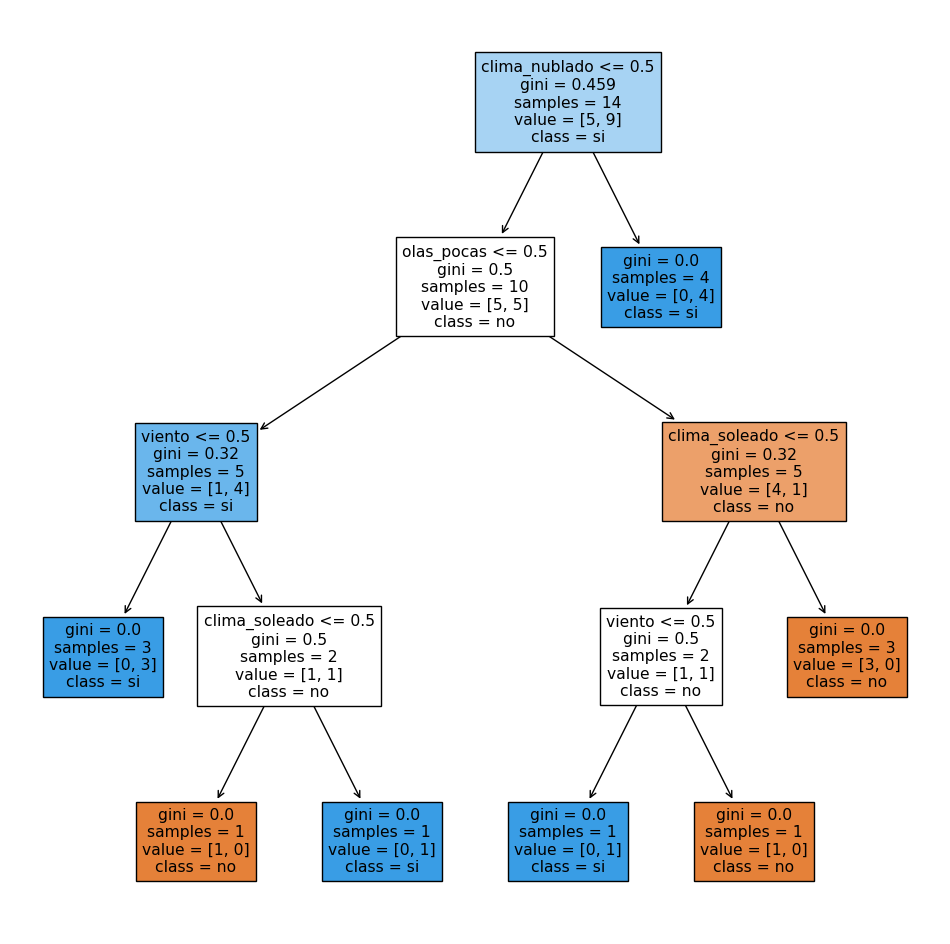

In [14]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf, 
               feature_names=["viento",
                              "clima_nublado","clima_soleado",
                              "temperatura_fresco", "temperatura_templado",
                              "olas_pocas"],  
               class_names=["no","si"],
               filled=True);

Este algoritmo utiliza el coeficiente de Gini como medida para saber que tan mezcladas estan las clases y hacer la division por ello en cada division veremos el resultado del calculo del coeficiente de Gini. 
Tambien veremos:
1. La columna elegida para hacer la division y su respectivo valor. Por ejemplo: `clima_nublado<=0.5`
2. La cantidad de muestras en cada paso (`samples`)
3. La cantidad de muestras de cada clase (`values`)
4. La decision que deberiamos tomar en cada caso (`class`)

Referencias:
    
- Self Information: https://en.wikipedia.org/wiki/Information_content
- Entropy: https://en.wikipedia.org/wiki/Entropy_(information_theory)
- Information Gain: https://en.wikipedia.org/wiki/Information_gain_(decision_tree)
- Gini Impurity: https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
- ID3: https://en.wikipedia.org/wiki/ID3_algorithm
- Scikit Learn Decision Tree: https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart

# Fin: [Volver al contenido del curso](https://www.freecodingtour.com/cursos/espanol/datascience/datascience.html)